# TP - HMMA238

Par Mathias Gout et Julie Røste.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## Exercice 1 - Le jeu de la vie

### Implémentation sans `numpy`

### Question 4:

In [2]:
from utils import calcul_nb_voisins
from utils import iteration_jeu

Z_init = [[0,0,0,0,0,0], 
          [0,0,0,1,0,0], 
          [0,1,0,1,0,0], 
          [0,0,1,1,0,0],
          [0,0,0,0,0,0], 
          [0,0,0,0,0,0]]
     
calcul_nb_voisins(Z_init)

[[0, 0, 0, 0, 0, 0],
 [0, 1, 3, 1, 2, 0],
 [0, 1, 5, 3, 3, 0],
 [0, 2, 3, 2, 2, 0],
 [0, 1, 2, 2, 1, 0],
 [0, 0, 0, 0, 0, 0]]

`calcul_nb_voisins(Z)` affiche le nombre de voisins vivants de chaque cellules

### Question 5:

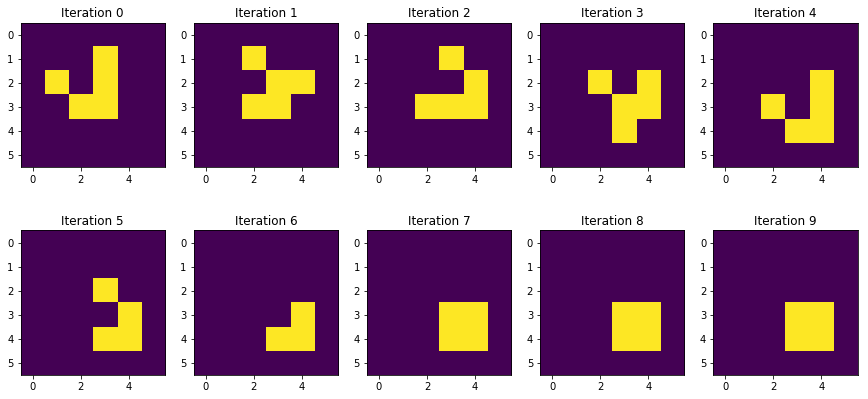

In [3]:
from utils import plotJeuDeLaVie

# On rappelle que l'on a renommé Z par Z_init
Z_init = [[0,0,0,0,0,0], 
          [0,0,0,1,0,0], 
          [0,1,0,1,0,0], 
          [0,0,1,1,0,0],
          [0,0,0,0,0,0], 
          [0,0,0,0,0,0]]

plotJeuDeLaVie(10, np.asarray(Z_init), iteration_jeu)

### Question 6:

On remarque que les cellules vivantes de l'itération 0 sont disposées de la même façon que celles de l'itération 4. 
<br/>Entre l'itération 0 et 4, les cellules vivantes se sont toutes déplacées d'une cellule en bas et d'une cellule à droite.

A partir de l'itération 7, les cellules ne changent plus d'état. Les quatres cellules vivantes sont regroupées en bas à droite et ont toutes 3 voisins vivants (aucun décès possible). 
<br/>Comme aucune cellule morte n'a 3 voisins vivants (pas de naissance possible), il n'y aura pas d'évolution dans les prochaines itérations


### Implémentation avec `numba`

### Question 7:

In [4]:
from numba import jit

Les fonctions utilisant `numpy` sont `calcul_np_voisins_jit` et `iteration_jeu_jit`. 

In [5]:
from utils import calcul_nb_voisins_jit, iteration_jeu_jit

On commence par montrer que nos fonctions `calcul_nb_voisins_np` et `iteration_jeu_np` fonctionnent correctement.

In [6]:
Z_init = [[0,0,0,0,0,0],
          [0,0,0,1,0,0], 
          [0,1,0,1,0,0], 
          [0,0,1,1,0,0],
          [0,0,0,0,0,0], 
          [0,0,0,0,0,0]]

# Modification de Z_init pour pouvoir l'utiliser dans calcul_nb_voisins_jit et iteration_jeu_jit
Z_np = np.array(Z_init)

print(calcul_nb_voisins_jit(Z_np))
iteration_jeu_jit(Z_np)

[[0. 0. 0. 0. 0. 0.]
 [0. 1. 3. 1. 2. 0.]
 [0. 1. 5. 3. 3. 0.]
 [0. 2. 3. 2. 2. 0.]
 [0. 1. 2. 2. 1. 0.]
 [0. 0. 0. 0. 0. 0.]]


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

On obtient bien les résultats attendus.

On calcule maintenant les temps de calculs de `calcul_nb_voisins`, `iteration_jeu` (sans `numba`) et `calcul_nb_voisins_jit`, `iteration_jeu_jit` (avec `numba`).
<br/> On les comparera et on déterminera dans quel cas on obtient le meilleur résultat.

In [7]:
Z_init = [[0,0,0,0,0,0],
          [0,0,0,1,0,0], 
          [0,1,0,1,0,0], 
          [0,0,1,1,0,0],
          [0,0,0,0,0,0], 
          [0,0,0,0,0,0]]

%timeit calcul_nb_voisins(Z_init)
%timeit iteration_jeu(Z_init)

21 µs ± 1.33 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
30.5 µs ± 1.68 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [8]:
Z_init = [[0,0,0,0,0,0],
          [0,0,0,1,0,0], 
          [0,1,0,1,0,0], 
          [0,0,1,1,0,0],
          [0,0,0,0,0,0], 
          [0,0,0,0,0,0]]

%timeit calcul_nb_voisins_jit(Z_np)
%timeit iteration_jeu_jit(Z_np)

1.07 µs ± 100 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
771 ns ± 41.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Les temps de calculs, quand on utilise `numba`, sont bien plus réduit.

### Question 8:

In [9]:
from ipywidgets import interact, fixed
from utils import plotJeuDeLaVie_manySP

In [10]:
n = 20

Z_huge = np.zeros((n,n))
Z_np = np.array( 
    [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]])

Z_huge[10:16,10:16] = Z_np

interact(plotJeuDeLaVie_manySP, nbIterations=(0, 30, 1), Z=fixed(Z_huge), iter_func=fixed(iteration_jeu_jit));

interactive(children=(IntSlider(value=15, description='nbIterations', max=30), Output()), _dom_classes=('widge…

Avec $n=20$, la matrice `Z_huge` converge à partir de la $23^{ème}$ itération. 

On peut aussi comparer les temps de calculs de `iteration_jeu` et `iteration_jeu_jit` avec les matrices `Z_np` et `Z_huge`.

In [11]:
Z_huge = np.zeros((20, 20))
Z_np = np.array( 
    [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]])

Z_huge[10:16,10:16] = Z_np

# On n'utilise pas numba
%timeit iteration_jeu(Z_np)
%timeit iteration_jeu(Z_huge)

80.6 µs ± 6.94 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.53 ms ± 47.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [12]:
Z_huge = np.zeros((20, 20))
Z_np = np.array( 
    [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]])

Z_huge[10:16,10:16] = Z_np

# On utilise numba
%timeit iteration_jeu_jit(Z_np)
%timeit iteration_jeu_jit(Z_huge)

701 ns ± 61 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
2.65 µs ± 37.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Le fait d'utiliser `numba` réduit les temps de calculs.
<br/> La matrice `Z_huge` augmente les temps de calculs car elle est plus grande que `Z_np`.

## Exercice 2 - Régression logistique

### Question 1:

In [13]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [14]:
X = mnist.data.astype('float64') 
y = mnist.target.astype('float64')

### Question 2:

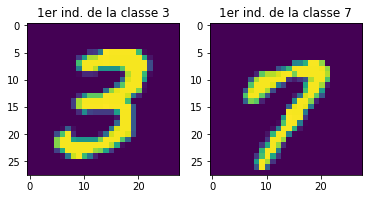

In [15]:
# On garde que les 3 et 7
X = X[(y==3) + (y==7)] 
y = y[(y==3) + (y==7)] 

# Premier individu de la classe 3 et 7
premier_3 = np.where(y==3)[0][0]
premier_7 = np.where(y==7)[0][0]

# On affiche les 2 individus
plt.subplot(1, 2, 1)
plt.title("1er ind. de la classe 3")
plt.imshow(X[premier_3].reshape(28,28))
plt.subplot(1, 2, 2)
plt.title("1er ind. de la classe 7")
plt.imshow(X[premier_7].reshape(28,28))

### Question 3:

In [16]:
from sklearn.linear_model import LogisticRegression 

# Regression logistique 
reg_log = LogisticRegression(fit_intercept=False, solver='liblinear').fit(X, y)

### Question 4:

In [17]:
from ipywidgets import interact, fixed
from utils import fig_digit 

In [18]:
interact(fig_digit, x=fixed(X[premier_7]), w=fixed(reg_log.coef_), alpha=(0.1,100,0.1));

interactive(children=(FloatSlider(value=50.00000000000001, description='alpha', min=0.1), Output()), _dom_clas…

### Question 5:

<IPython.core.display.Javascript object>


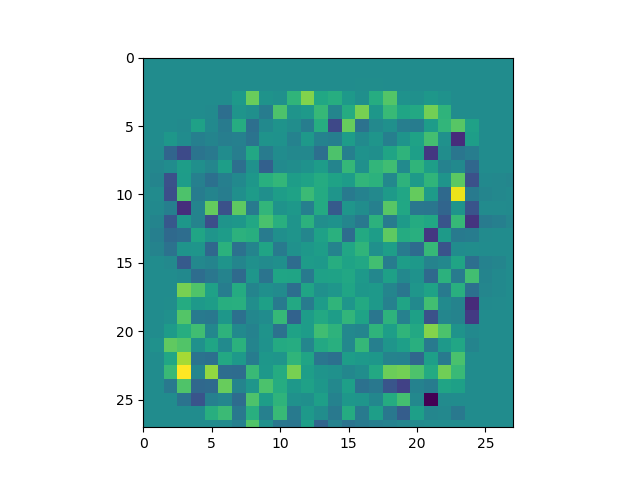

In [19]:
# Nous avons remarqué un problème avec la commande %matplotlib notebook. 
# Les graphes s'afficherons correctement à la première compilation mais, si vous en effectuez une deuxième,
# il ne s'afficheront pas correctement.
# De plus, les graphes des questions précédentes ne seront pas à la bonne taille.
# Il faudra "clear output" puis recompiler pour que l'affichage soit de nouveau correct.
# Cette commande est nécessaire pour l'animation qui va suivre, nous ne l'aurions pas utilisé sinon.
%matplotlib notebook

fig = plt.figure()
ax = plt.axes(xlim=(0, 27), ylim=(27, 0))
ims = []

for i in range(100):
    im = fig_digit(X[premier_7], reg_log.coef_, i)
    ims.append([im])
    
anim = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

anim.to_html5_video()
plt.show()

### Question 6: 

À partir de l'équation (1) de l'énoncé du $\textbf{TP}$, on peut écrire $\alpha$ comme: 

$$\alpha  = (x-x_{mod}) {||w||}^2 (w^Tx)^{-1}.$$

### Question 7:

<IPython.core.display.Javascript object>


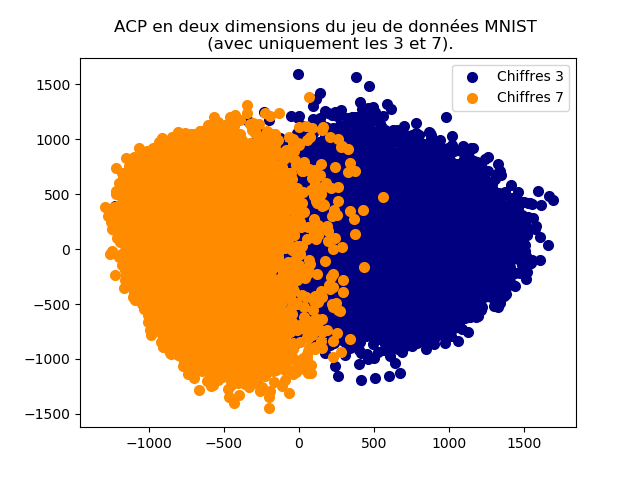

In [20]:
from sklearn.decomposition import PCA

n_components = 2

pca = PCA(n_components = n_components)
X_pca = pca.fit_transform(X)

colors = ['navy','darkorange'] #For number 3 and 7.

plt.figure()
for color, i, target_name in zip(colors,[3,7],['Chiffres 3','Chiffres 7']):
    plt.scatter(X_pca[y==i,0],X_pca[y==i,1],
                color=color,lw=2,label=target_name)
    plt.title('ACP en deux dimensions du jeu de données MNIST \n (avec uniquement les 3 et 7).')
    plt.legend(loc='best',shadow=False,scatterpoints=1)

On voit que les deux groupes sont presque parfaitement séparés. 